# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

### Crop image

HSV:  [ 47. 245. 221.]


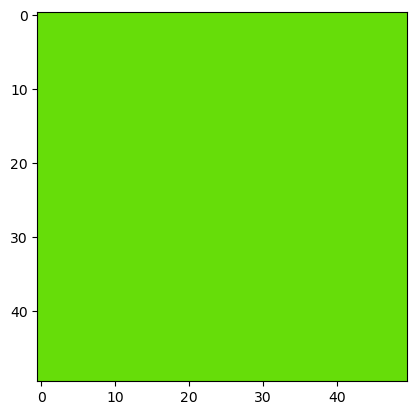

In [27]:
input_image = cv2.imread("images/green-screen.png")
croped_region = input_image[:50,:50,:]
plt.imshow(croped_region[...,::-1])

hsv = cv2.cvtColor(croped_region, cv2.COLOR_BGR2HSV)
print("HSV: ", np.mean(hsv, axis=(0,1)))

### remove from image

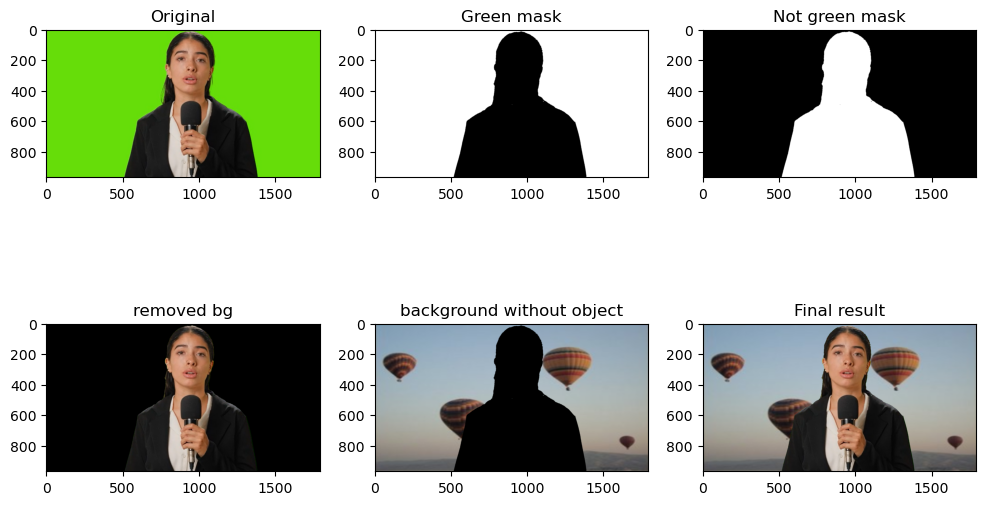

In [30]:
input_image = cv2.imread("images/green-screen.png")
bg_image = cv2.imread("images/balloon.png")
hsv = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)

h, w, _ =input_image.shape
bg_image = cv2.resize(bg_image,(w, h))
l_green = np.array([35, 50, 50])
u_green = np.array([85, 255, 255])

mask = cv2.inRange(hsv, l_green, u_green)
mask_not_green = cv2.bitwise_not(mask)

new_bg = cv2.bitwise_and(bg_image, bg_image, mask=mask)
removed_bg = cv2.bitwise_and(input_image, input_image, mask=mask_not_green)

final = cv2.add(removed_bg, new_bg)

plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(232);plt.imshow(mask, cmap='gray');plt.title("Green mask");
plt.subplot(233);plt.imshow(mask_not_green, cmap='gray');plt.title("Not green mask");
#second row
plt.subplot(234);plt.imshow(removed_bg[...,::-1]);plt.title("removed bg");
plt.subplot(235);plt.imshow(new_bg[...,::-1]);plt.title("background without object");
plt.subplot(236);plt.imshow(final[...,::-1]);plt.title("Final result");

### Remove green screen from video

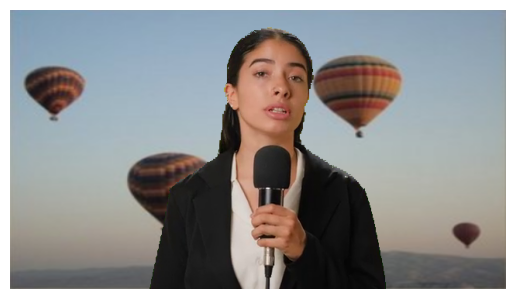

In [4]:
# Load video clip
cap = cv2.VideoCapture('./videos/greenscreen.mp4')
bg_image = cv2.imread("images/balloon.png")

# Get the height and width of the frame (required to be an interger)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#resize to frame size
bg_image = cv2.resize(bg_image,(w, h))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    background = bg_image.copy()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_green = np.array([35, 50, 50])
    u_green = np.array([85, 255, 255])

    mask = cv2.inRange(hsv, l_green, u_green)
    mask_not_green = cv2.bitwise_not(mask)
    removed_bg = cv2.bitwise_and(frame, frame, mask=mask_not_green)
    background = cv2.bitwise_and(background, background, mask=mask)

    final = cv2.add(removed_bg, background)
    cv2.imshow("result", final)
    if cv2.waitKey(15) & 0xFF == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show();

### Green edge correction

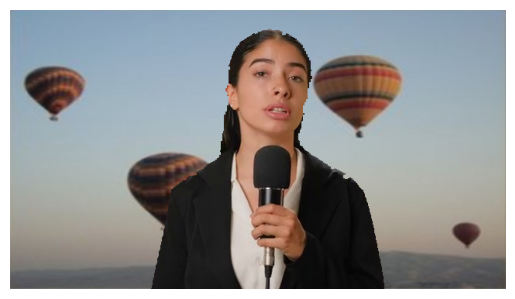

In [3]:
# Load video clip
cap = cv2.VideoCapture('./videos/greenscreen.mp4')
bg_image = cv2.imread("images/balloon.png")

# Get the height and width of the frame (required to be an interger)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#resize to frame size
bg_image = cv2.resize(bg_image,(w, h))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    background = bg_image.copy()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_green = np.array([35, 50, 50])
    u_green = np.array([85, 255, 255])

    mask = cv2.inRange(hsv, l_green, u_green)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.dilate(mask, kernel)
    mask_not_green = cv2.bitwise_not(mask)

    removed_bg = cv2.bitwise_and(frame, frame, mask=mask_not_green)
    background = cv2.bitwise_and(background, background, mask=mask)

    final = cv2.add(removed_bg, background)
    cv2.imshow("result", final)
    if cv2.waitKey(15) & 0xFF == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show();

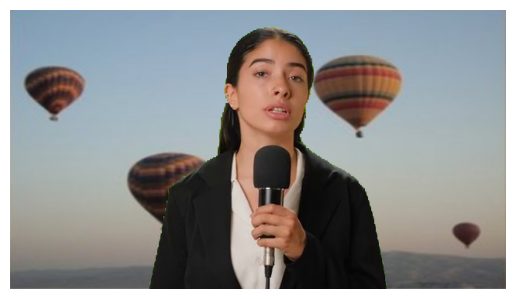

In [24]:
# Load video clip
cap = cv2.VideoCapture('./videos/greenscreen.mp4')
bg_image = cv2.imread("images/balloon.png")

# Get the height and width of the frame (required to be an interger)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#resize to frame size
bg_image = cv2.resize(bg_image,(w, h))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    background = bg_image.copy()
    lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
    a_channel = lab[:,:,1]
    _, th = cv2.threshold(a_channel,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    mask_green = cv2.bitwise_not(th)
    removed_bg = cv2.bitwise_and(frame, frame, mask=th)
    background = cv2.bitwise_and(background, background, mask=mask_green)

    final = cv2.add(removed_bg, background)
    cv2.imshow("result", final)
    if cv2.waitKey(15) & 0xFF == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show();